# Libraries for Neural Networks - TensorFlow (image classification)

## Loading the dataset

In [1]:
import tensorflow
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

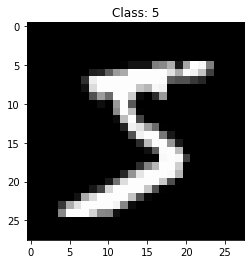

In [3]:
plt.imshow(X_train[0], cmap='gray')
plt.title('Class: ' + str(y_train[0]))
plt.show()

In [4]:
# Convert image 2D to 1D
X_train = X_train.reshape(60000, 28*28)

In [5]:
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [6]:
X_test = X_test.reshape(10000, 28*28)

In [7]:
# change data type to divide
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
# change y to binary value to fit output layer
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

## Neural network (training)

In [9]:
# 784 -> 397 -> 397 -> 10
network = Sequential()
network.add(Dense(input_shape = (784,), units = 397, activation='relu'))
network.add(Dense(units=397, activation='relu'))
network.add(Dense(units=10, activation='softmax'))
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history = network.fit(X_train, y_train, batch_size=128, epochs=100)

Epoch 1/100
469/469 [==============================] - 10s 20ms/step - loss: 2.4024 - accuracy: 0.9024
Epoch 2/100
469/469 [==============================] - 6s 13ms/step - loss: 0.3451 - accuracy: 0.9530
Epoch 3/100
469/469 [==============================] - 4s 9ms/step - loss: 0.2138 - accuracy: 0.9644
Epoch 4/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1602 - accuracy: 0.9713
Epoch 5/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1240 - accuracy: 0.9757
Epoch 6/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1218 - accuracy: 0.9765
Epoch 7/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1124 - accuracy: 0.9779
Epoch 8/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0903 - accuracy: 0.9794
Epoch 9/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0862 - accuracy: 0.9806
Epoch 10/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0832 - acc

## Neural network (evaluation)

In [11]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


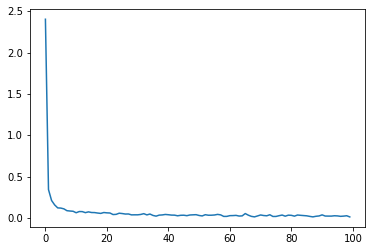

In [12]:
plt.plot(history.history['loss'])

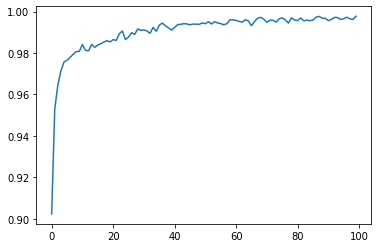

In [13]:
plt.plot(history.history['accuracy'])

In [14]:
accuracy_test = network.evaluate(X_test, y_test)
print(accuracy_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5604 - accuracy: 0.9766
[0.5604305863380432, 0.9765999913215637]


Text(0.5, 1.0, 'Class: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]')

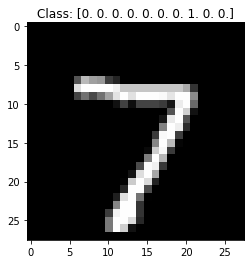

In [15]:
plt.imshow(X_test[0].reshape(28, 28), cmap='gray')
plt.title('Class: ' + str(y_test[0]))